### Projet Data Science: Prédiction des Prix Immobiliers - USE CASE

Nous sommes un fonds d'investissement actif sur le marché immobilier, cherchant à augmenter nos revenus en identifiant des opportunités immobilières sous-évaluées. Notre objectif principal est de trouver des biens immobiliers sous-évalués, de les acheter, et de les revendre ultérieurement pour réaliser une marge bénéficiaire significative. Pour atteindre cet objectif, nous développons un modèle de machine learning capable de prédire avec précision les prix des maisons en fonction de diverses caractéristiques telles que la taille de la maison, l'emplacement, et d'autres attributs pertinents.

#### Sources de données

Nous collaborons avec des agences immobilières locales pour obtenir des listings détaillés de propriétés, des données historiques de ventes, et des conditions actuelles du marché. Les agences immobilières sont des partenaires clés car elles possèdent des informations précises et à jour sur le marché immobilier local. Cette collaboration nous permet d'accéder à des données riches et variées, incluant les caractéristiques physiques des maisons (surface habitable, nombre de chambres, salles de bains, etc.) et les prix de vente historiques pour des propriétés similaires dans la même zone géographique.

#### Collecte de données

La collecte de données consiste à rassembler des ensembles de données complets et à jour auprès des agences immobilières, incluant les caractéristiques des propriétés, les données transactionnelles historiques et les conditions du marché. Le nettoyage et le prétraitement des données assurent la qualité des données. Nous gérons les valeurs manquantes en utilisant des techniques d'imputation appropriées, normalisons les caractéristiques pour assurer la comparabilité, et transformons les variables catégorielles en variables numériques à l'aide de techniques d'encodage telles que l'encodage one-hot.

#### Construction du modèle

Pour développer notre modèle, nous explorons différentes techniques de régression. Nous utilisons des modèles de régression linéaire pour établir une relation entre les caractéristiques des propriétés et leur prix de vente. Nous explorons également des modèles avancés de régression tels que Ridge, Lasso, et ElasticNet pour améliorer la précision. Ces modèles sont choisis pour leur capacité à gérer des données multivariées et à éviter le sur-ajustement en pénalisant les coefficients de régression.

L'entraînement et l'évaluation du modèle se font en divisant les données en ensembles d'entraînement et de test. Nous utilisons la métrique RMSLE (Root Mean Squared Logarithmic Error) pour mesurer la précision des prédictions. Cette métrique est choisie car elle pénalise proportionnellement les grandes erreurs, ce qui est adapté à la prédiction des prix immobiliers.

Le déploiement du modèle dans un environnement de production permet des prédictions en temps réel. L'intégration du modèle dans des interfaces utilisateur conviviales facilite son utilisation par nos décideurs internes, qu'ils soient membres de notre équipe d'investissement ou analystes financiers.

#### Proposition de Valeur

Pour les agences immobilières, notre modèle accélère le processus de vente en fournissant des prédictions de prix précises, permettant ainsi de mettre en place des stratégies de tarification compétitives. Cela réduit le temps de vente et augmente la satisfaction des clients.

Pour les investisseurs, notre modèle identifie les propriétés sous-évaluées, offrant ainsi des opportunités d'investissement avec un potentiel de retour sur investissement élevé. En utilisant des prédictions de prix précises, les investisseurs peuvent gérer les risques et optimiser leurs stratégies d'investissement avec un objectif de marge bénéficiaire de 20%.

Pour les vendeurs de biens immobiliers, notre modèle offre la possibilité de vendre rapidement sans avoir à passer des mois à chercher un acheteur. Ils ont un partenaire avec des ressources financières prêtes à acheter immédiatement. Nous, en tant que fonds d'investissement, prenons les risques.

#### Décisions

Les agences immobilières bénéficient de cycles de vente plus rapides et de meilleures stratégies de tarification, ce qui améliore leur efficacité opérationnelle et leur compétitivité sur le marché.

Notre équipe d'investissement utilise les prédictions pour identifier et investir dans des propriétés sous-évaluées, maximisant ainsi les retours sur investissement et optimisant notre portefeuille immobilier.

#### Tâches de prédiction

Les données de haute qualité sur les propriétés et les transactions fournies par les agences immobilières sont essentielles pour la précision du modèle. La technologie utilisée comprend une infrastructure robuste de machine learning pour l'entraînement et le déploiement du modèle. L'expertise combinée de data scientists et d'experts immobiliers est nécessaire pour développer et affiner les modèles de prédiction, garantissant ainsi des résultats fiables et actionnables.

#### Faire des prédictions

Les modèles sont réajustés en fonction des retours sur investissements réels et des nouvelles données collectées. Cela permet de maintenir la précision et la pertinence du modèle dans un marché immobilier dynamique.

#### Simulation d'impact

Nous simulons des scénarios d'achat et de vente pour évaluer l'impact des prédictions de prix sur les décisions d'investissement. Ces simulations sont basées sur des scénarios réels et permettent d'optimiser les stratégies d'achat et de vente en fonction des prédictions du modèle.

#### Attributs (features)

Les attributs utilisés pour les prédictions incluent des caractéristiques détaillées des propriétés telles que la localisation, la taille, l'état général, et les équipements disponibles. À l'avenir, nous envisageons d'inclure des facteurs externes comme les tendances du marché et les taux d'intérêt.

#### Indicateurs Clés (live monitoring)

##### Précision du Modèle (RMSLE)

La précision du modèle est mesurée en utilisant la métrique RMSLE (Root Mean Squared Logarithmic Error). Voici pourquoi cette métrique est appropriée pour notre cas d'utilisation :

1. **Gestion des grandes erreurs** : La RMSLE pénalise proportionnellement les grandes erreurs. Dans le contexte de la prédiction des prix immobiliers, les grandes erreurs peuvent entraîner des décisions d'investissement très coûteuses. Par exemple, surévaluer ou sous-évaluer significativement une propriété peut entraîner des pertes importantes. La RMSLE assure que ces erreurs sont prises en compte de manière stricte, ce qui améliore la fiabilité des prédictions.

2. **Échelle logarithmique** : En utilisant une échelle logarithmique, la RMSLE atténue l'impact des grandes valeurs aberrantes. Dans le marché immobilier, il peut y avoir des propriétés avec des prix extrêmement élevés ou bas qui pourraient influencer les résultats de manière disproportionnée. La transformation logarithmique aide à stabiliser la variance et à traiter les grandes valeurs de manière plus équilibrée.

3. **Comparabilité des erreurs** : La RMSLE permet de comparer les erreurs de prédiction de manière relative plutôt qu'absolue. Cela signifie que les erreurs pour des propriétés moins chères et plus chères sont traitées de manière équitable. Pour un fonds d'investissement, il est important de maintenir une précision uniforme sur toute la gamme de prix des propriétés.

##### Marge Bénéficiaire

La marge bénéficiaire est suivie pour mesurer le profit réalisé à partir des investissements immobiliers identifiés par le modèle. Cet indicateur clé permet de :

1. **Évaluer la performance financière** : En suivant la marge bénéficiaire, nous pouvons mesurer l'efficacité de notre modèle en termes de retour sur investissement. Cela nous aide à comprendre combien nous gagnons par rapport au capital investi dans les propriétés.

2. **Optimiser les stratégies d'investissement** : En analysant la marge bénéficiaire, nous pouvons identifier quelles stratégies d'achat et de vente sont les plus rentables. Cela nous permet d'ajuster notre approche pour maximiser les profits.

3. **Suivi en temps réel** : La surveillance en temps réel de la marge bénéficiaire nous permet de réagir rapidement aux changements du marché immobilier. Si nous constatons que les marges bénéficiaires diminuent, nous pouvons immédiatement réévaluer notre modèle et nos stratégies d'investissement pour corriger le tir.

Ces indicateurs clés sont surveillés en temps réel pour assurer la performance et l'efficacité du modèle. La surveillance en temps réel est essentielle pour détecter rapidement les anomalies, ajuster les modèles en fonction des nouvelles données, et garantir que les prédictions restent précises et pertinentes dans un marché immobilier en constante évolution.

---

In [152]:
#!pip install optuna
#!pip install catboost
#!pip install pandas
#!pip install numpy
#!pip install xgboost
#!pip install catboost
#!pip install matplotlib
#!pip install seaborn
#!pip install optuna
#!pip install scipy
#!pip install scikit-learn
#!pip install category_encoders
#!pip install lightgbm
#!pip install shap
#!pip install kaggle

In [153]:

# Igonore Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Manipulation
import pandas as pd
import numpy as np
import xgboost as xgb
import catboost
import statsmodels.api as sm

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
import lightgbm as lgb
from optuna.samplers import TPESampler
import optuna.visualization as vis
import shap
import scipy.stats as stats

# Data Transformation
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.metrics import make_scorer

# Feature Selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LassoCV

# Pipeline
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import TargetEncoder

# Regression Algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.base import BaseEstimator, TransformerMixin

from datetime import datetime

### Exploration Initiale des Données

Pour comprendre et explorer les données disponibles dans notre projet de prédiction des prix immobiliers, nous effectuons une série de manipulations initiales sur la DataFrame. Voici une explication et une justification pour chaque étape :

#### Chargement des Données

Nous chargeons les données à partir du fichier `train.csv` en utilisant la colonne `Id` comme index de la DataFrame. Cela permet d'identifier chaque enregistrement de manière unique, facilitant la manipulation et l'analyse ultérieure.

#### Affichage des Premières Lignes

Nous affichons les cinq premières lignes de la DataFrame pour obtenir un aperçu rapide de la structure des données et vérifier que le fichier a été chargé correctement. Cela permet d'identifier les types de colonnes et les premières valeurs.


In [154]:
train = pd.read_csv("train.csv", index_col= "Id")
train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Informations Générales sur la DataFrame

Nous obtenons un résumé concis de la DataFrame, incluant le nombre total d'entrées, le nombre de colonnes, le type de données de chaque colonne et la quantité de valeurs non nulles. Cela aide à comprendre la structure des données et à planifier le prétraitement nécessaire.

In [155]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

#### Comptage des Valeurs Manquantes

Nous calculons le nombre de valeurs manquantes pour chaque colonne afin d'identifier les colonnes avec des données manquantes. Cela est crucial pour décider des stratégies de traitement des valeurs manquantes, comme l'imputation ou la suppression.

In [156]:
train.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

#### Forme de la DataFrame

Nous vérifions les dimensions de la DataFrame pour connaître le nombre total de lignes et de colonnes. Cela permet de comprendre l'ampleur des données disponibles et de planifier les ressources nécessaires pour le traitement.

In [157]:
train.shape

(1460, 80)

#### Statistiques Descriptives

Nous obtenons des statistiques descriptives pour toutes les colonnes, ce qui permet d'explorer la distribution des données, les valeurs centrales et la dispersion. Ces statistiques sont essentielles pour identifier les anomalies et orienter les décisions de prétraitement.

In [158]:
train.describe(include="all")

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


#### Pourcentage de Valeurs Manquantes

Nous calculons le pourcentage de valeurs manquantes pour chaque colonne et trions les résultats par ordre décroissant. Cela aide à évaluer l'impact des données manquantes et à prioriser les efforts de nettoyage, en se concentrant sur les colonnes les plus affectées.

In [159]:
train_na = train.isna().sum().reset_index(name="missing values")
train_na["%"] = round((train_na["missing values"] / train.shape[0])*100, 2)
train_na.sort_values(by="%", ascending=False)

,index,missing values,%
71,PoolQC,1453,99.52
73,MiscFeature,1406,96.30
5,Alley,1369,93.77
72,Fence,1179,80.75
24,MasVnrType,872,59.73
...,...,...,...
38,Heating,0,0.00
39,HeatingQC,0,0.00
1,MSZoning,0,0.00
42,1stFlrSF,0,0.00


### Modèle Baseline : Explication et Justification

#### Sélection des Features

Les features choisies sont : `OverallQual`, `OverallCond`, `GrLivArea`, `TotalBsmtSF`, `GarageArea`, `FullBath`, `HalfBath`, et `BedroomAbvGr`. Elles sont des indicateurs clés de la valeur d'une propriété, reflétant la qualité, la condition, et la taille de la maison. Elles ont été sélectionnées par un expert immobilier pour leur importance dans la détermination des prix des maisons.

#### Transformation Logarithmique de la Variable Cible

La variable cible `SalePrice` est transformée logarithmiquement (`np.log1p`) pour normaliser sa distribution, améliorant ainsi la performance du modèle.

#### Modèle de Régression Linéaire

Le modèle de régression linéaire est utilisé comme modèle de base en raison de sa simplicité et pour servir de point de référence.

#### Validation Croisée

La validation croisée à 5 plis (`cv=5`) est utilisée pour évaluer le modèle, avec la métrique RMSLE (Root Mean Squared Logarithmic Error) pour pénaliser proportionnellement les grandes erreurs.

#### Justification du Modèle Baseline

1. **Point de Référence** : Le modèle baseline fournit un point de comparaison pour évaluer les améliorations apportées par des modèles plus complexes.
2. **Validation des Hypothèses** : Il permet de vérifier les hypothèses de la régression linéaire, telles que la linéarité, la normalité des résidus, l'homoscedasticité et l'absence de multicolinéarité.
3. **Évaluation de la Simplicité** : En utilisant un modèle simple, nous pouvons rapidement identifier les problèmes potentiels dans les données.
4. **Identification des Problèmes de Données** : Les résultats du modèle baseline peuvent indiquer des relations non linéaires ou des variables manquantes importantes, nécessitant un traitement plus approfondi.

Le modèle de base est essentiel pour orienter le développement et l'amélioration de modèles prédictifs plus sophistiqués.

In [160]:
# Select features for the baseline model
features = ['OverallQual', 'OverallCond', 'GrLivArea', 'GarageArea',
            'FullBath', 'BedroomAbvGr']
X = train[features]
y = np.log1p(train['SalePrice'])  # Log transform the target variable

# Define the linear regression model
model = LinearRegression()

# Cross-validation of the model
cv_scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)

# Convert the negative mean squared log error to positive RMSLE
rmsle_cv_scores = np.sqrt(-cv_scores)

# Output of the scores
print("CV Scores: ", rmsle_cv_scores)
# Output of the average score
print("Average CV Score: ", np.mean(rmsle_cv_scores))


CV Scores:  [0.18009997 0.20081169 0.18274392 0.16797583 0.2096696 ]
Average CV Score:  0.1882602034566492


### Validation des hypothèses de la régression linéaire

#### Tracé des résidus par rapport aux prédicteurs

Nous traçons les résidus par rapport à chaque feature sélectionnée pour vérifier les hypothèses de la régression linéaire :

1. **Linéarité** : Les résidus doivent être distribués aléatoirement autour de zéro.
2. **Homoscedasticité** : La variance des résidus doit être constante.
3. **Absence de Patterns** : Les résidus ne doivent pas montrer de motifs spécifiques.

Ces graphiques permettent de confirmer si les hypothèses de base de la régression linéaire sont respectées.

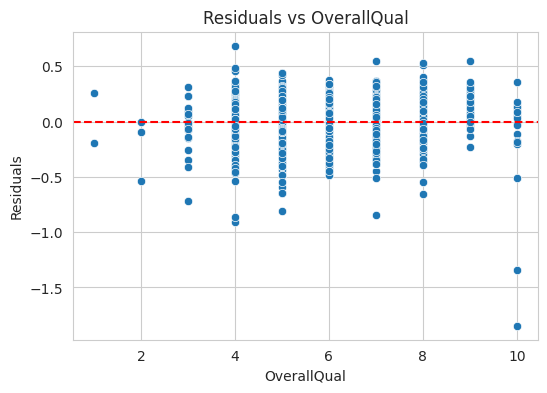

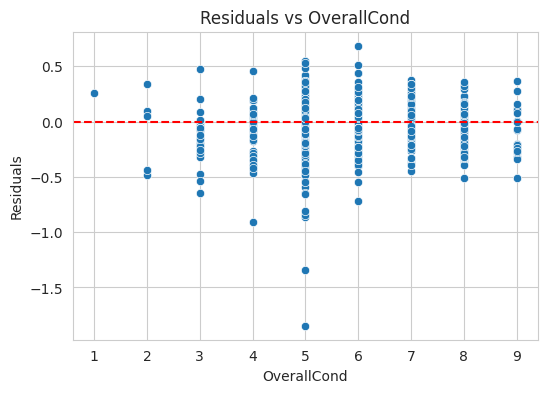

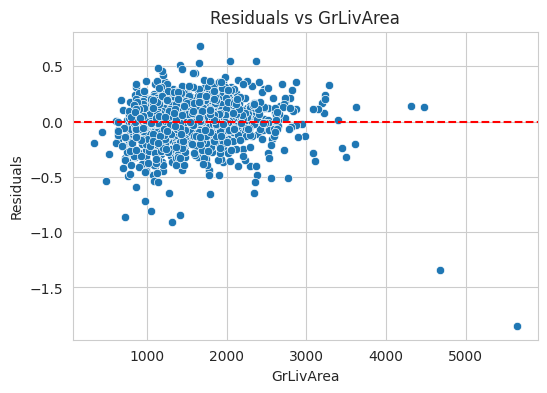

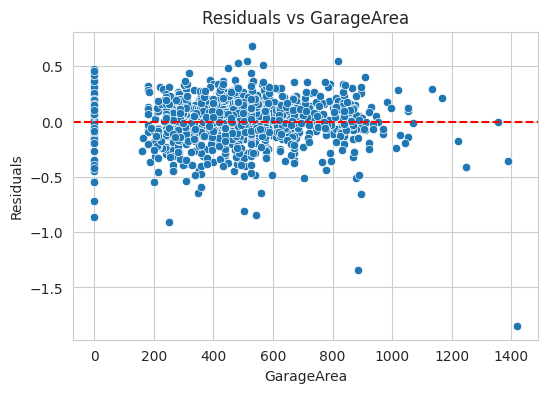

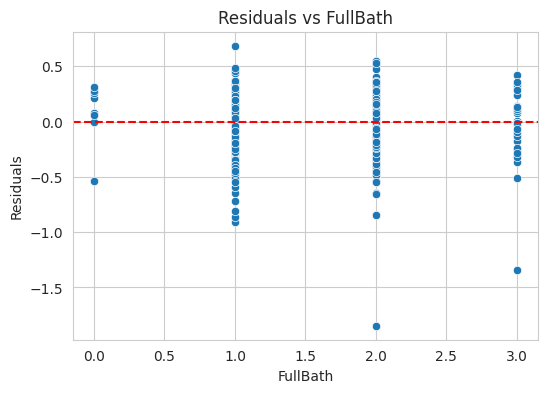

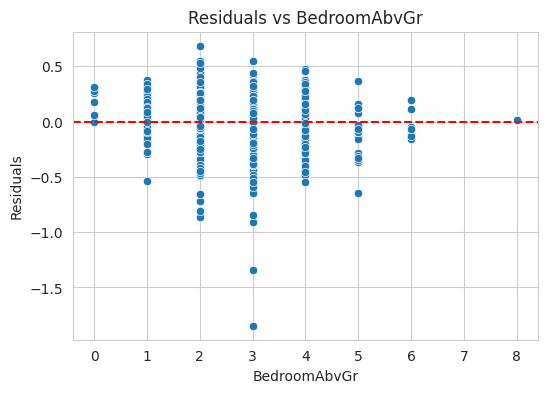

In [161]:
model.fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred

# Tracer les résidus par rapport aux prédicteurs
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X[feature], y=residuals)
    plt.title(f'Residuals vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()

#### Histogramme des Résidus

L'histogramme des résidus permet de vérifier la normalité des résidus. Pour que l'hypothèse de normalité soit respectée, les résidus doivent suivre une distribution en cloche (distribution normale).

#### Q-Q Plot des Résidus

Le Q-Q plot compare les quantiles des résidus aux quantiles d'une distribution normale. Si les points suivent une ligne droite diagonale, cela indique que les résidus sont normalement distribués. Cela valide l'hypothèse de normalité des résidus.

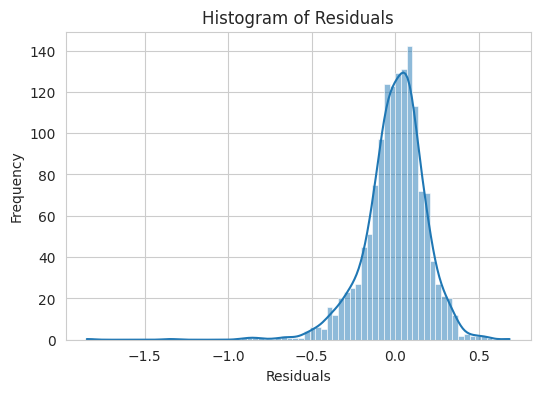

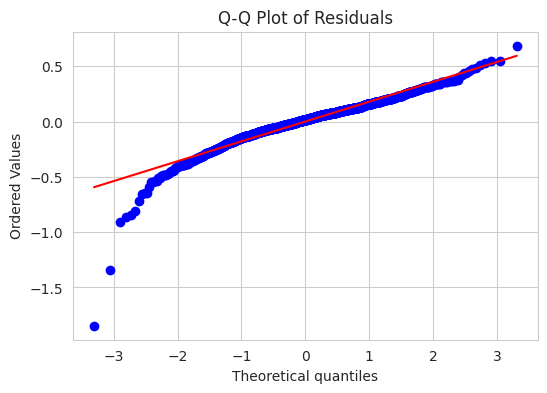

In [162]:
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()



#### Heatmap des Corrélations

Nous traçons une heatmap de la matrice de corrélation pour visualiser ces relations. La heatmap affiche les coefficients de corrélation entre chaque paire de features, avec des couleurs indiquant la force et la direction des corrélations.

#### Absence de Multicolinéarité

Cette visualisation permet de vérifier l'absence de multicolinéarité élevée entre les features. La multicolinéarité se produit lorsque deux ou plusieurs features sont fortement corrélées, ce qui peut compliquer l'interprétation des coefficients de régression et diminuer la performance du modèle. Des coefficients de corrélation proches de +1 ou -1 indiquent une forte multicolinéarité.


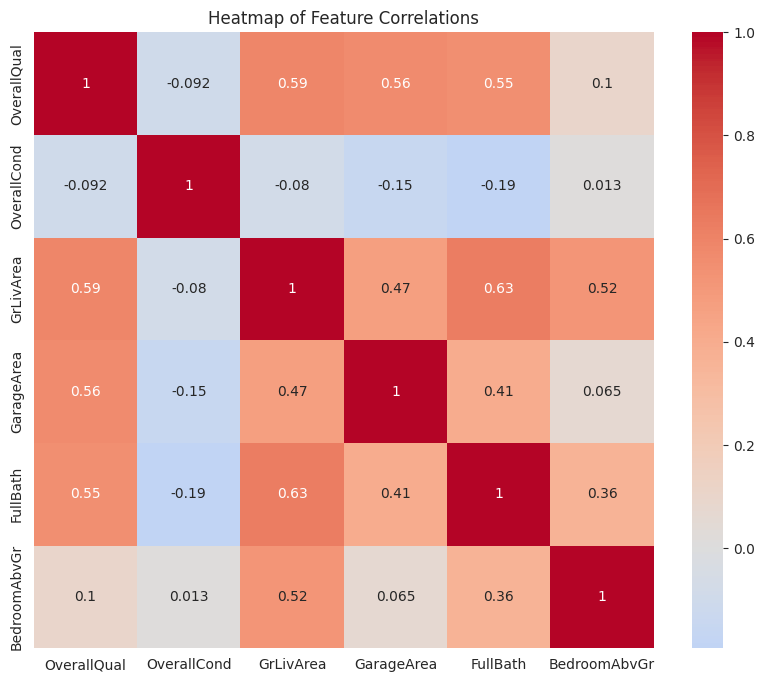

In [163]:
correlation_matrix = X.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Feature Correlations')
plt.show()

### Pipeline de prétraitement

#### Transformer personnalisé : YearToAgeTransformer

Nous avons créé un transformateur personnalisé `YearToAgeTransformer` pour convertir les colonnes d'années (`YearBuilt`, `YearRemodAdd`, `GarageYrBlt`) en colonnes d'âges en soustrayant l'année actuelle. Transformer les années en âges permet de standardiser ces variables temporelles, facilitant l'interprétation et améliorant potentiellement la performance du modèle.

#### Sélection des colonnes

Nous avons sélectionné les colonnes numériques qui ne sont pas des années et qui ne sont pas la cible (`SalePrice`). Les colonnes catégorielles ordinales avec un ordre naturel ont également été identifiées, ainsi que les colonnes catégorielles nominales sans ordre naturel. Cette distinction permet d'appliquer des transformations spécifiques adaptées à chaque type de données, améliorant ainsi la qualité du prétraitement.

#### Définition des catégories ordinales

Les catégories pour les features ordinales sont définies explicitement, indiquant l'ordre de chacune. Fournir les catégories ordinales assure que l'encodage respecte l'ordre naturel des valeurs, ce qui est important pour la précision du modèle.

#### Transformers

1. **numeric_transformer** :
   - **YearToAgeTransformer** : Convertit les années en âges.
   - **SimpleImputer** : Impute les valeurs manquantes avec zéro.
   - **StandardScaler** : Normalise les données pour assurer que chaque feature ait une moyenne de zéro et une variance de un.

2. **ordinal_transformer** :
   - **SimpleImputer** : Impute les valeurs manquantes avec 'NA'.
   - **OrdinalEncoder** : Encode les catégories ordinales en respectant leur ordre naturel.

3. **nominal_transformer** :
   - **SimpleImputer** : Impute les valeurs manquantes avec 'NA'.
   - **TargetEncoder** : Encode les catégories nominales en utilisant la cible.

#### Imputation des valeurs manquantes avec zéro

Nous avons choisi d'imputer les valeurs manquantes avec zéro plutôt qu'avec la moyenne ou le mode. 

**Avantages** :
- **Simplicité** : L'imputation avec zéro est simple et rapide à implémenter.
- **Préservation des données** : Cette méthode évite d'introduire des biais potentiels dans les données en utilisant des valeurs moyennes ou modales, qui pourraient ne pas être représentatives de certaines sous-populations.
- **Indication de manque de données** : En remplaçant les valeurs manquantes par zéro, nous pouvons indiquer qu'il manquait des données à l'origine, ce qui peut être pris en compte dans les analyses ultérieures.

**Inconvénients** :
- **Perturbation des moyennes et variances** : L'ajout de zéros peut fausser les moyennes et les variances des features, particulièrement si les valeurs manquantes ne sont pas aléatoires.
- **Interprétation** : Les zéros ajoutés peuvent être interprétés comme des valeurs légitimes, ce qui peut poser problème si zéro n'a pas de signification réelle pour certaines features.

#### Combinaison des transformations

Le `ColumnTransformer` combine les transformations pour chaque type de colonne, et passe les colonnes d'années transformées directement. Cette approche modulaire permet de traiter chaque type de données de manière spécifique et appropriée, assurant ainsi une préparation optimale des données pour le modèle de machine learning.

In [164]:
# Custom transformer to convert year columns to age columns
class YearToAgeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, current_year):
        self.current_year = current_year

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for col in X.columns:
            X[col] = self.current_year - X[col]
        return X

# Define current year using datetime module
current_year = datetime.now().year

# Identify the year columns
year_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

# Define feature sets
numerical_cols = [col for col in train.select_dtypes(include=['int64', 'float64']).columns if col not in year_cols and col != 'SalePrice']
ordinal_features = [
    'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
    'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
    'PoolQC', 'Fence'
]
nominal_features = [col for col in train.select_dtypes(include=['object']).columns if col not in ordinal_features]

# Define ordinal categories
ordinal_categories = {
    'OverallQual': list(range(1, 11)),
    'OverallCond': list(range(1, 11)),
    'ExterQual': ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtExposure': ['NA', 'No', 'Mn', 'Av', 'Gd'],
    'BsmtFinType1': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFinType2': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'HeatingQC': ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual': ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Functional': ['NA','Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    'FireplaceQu': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageFinish': ['NA', 'Unf', 'RFn', 'Fin'],
    'GarageQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'PoolQC': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Fence': ['NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']
}

# Transformers
numeric_transformer = Pipeline(steps=[
    ("year_to_age", YearToAgeTransformer(current_year=current_year)),
    ("imputer", SimpleImputer(strategy='constant', fill_value=0)),  # Using constant strategy for numerical columns with 0 as fill value
    ("scaler", StandardScaler())
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),  # Use 'NA' as the fill value for missing ordinal data
    ('encoder', OrdinalEncoder(categories=[ordinal_categories[col] for col in ordinal_features], handle_unknown='use_encoded_value', unknown_value=-1))
])

nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),  # Use 'NA' as the fill value for missing nominal data
    ('encoder', TargetEncoder())
])

# Combine new features with existing transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('ord', ordinal_transformer, ordinal_features),
        ('nom', nominal_transformer, nominal_features),
        ('year', 'passthrough', year_cols)
    ],
    remainder='passthrough'  # Add this to handle remaining columns
)

# Final pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('global_imputer', SimpleImputer(strategy='constant', fill_value=0))  # Add global imputer to handle any remaining NaNs with 0
])


### Explication et justification du traitement des données prétraitées

#### Fit et transformation des données

Nous ajustons le pipeline et transformons les données en utilisant `pipeline.fit_transform()` sur les données d'entraînement sans la colonne cible (`SalePrice`). Cette étape applique toutes les transformations définies dans le pipeline sur les données d'entraînement.

#### Obtention des noms des features

1. **Noms des features numériques** : Les noms des features numériques sont obtenus directement à partir des colonnes sélectionnées.
2. **Noms des features ordinales** : Les noms des features ordinales sont également obtenus directement à partir des colonnes sélectionnées.
3. **Noms des features nominales** : Les noms des features nominales sont extraits du transformateur de préprocesseur nominal, en utilisant `get_feature_names_out()` pour obtenir les noms des features après encodage.
4. **Noms des features années** : Les noms des features d'années sont conservés tels quels.

Ces étapes permettent de garder une trace des noms de toutes les features après transformation, ce qui est important pour l'interprétation et l'analyse des résultats du modèle.

#### Conversion des données prétraitées en DataFrame

Les données prétraitées sont converties en un DataFrame pandas avec les noms de colonnes appropriés. Cela facilite l'analyse et la manipulation des données prétraitées, permettant une intégration plus fluide avec d'autres outils et bibliothèques d'analyse de données.

#### Vérification des NaNs

Nous vérifions la présence de valeurs NaN dans le DataFrame prétraité. Cela nous assure que le pipeline de prétraitement a correctement imputé toutes les valeurs manquantes et qu'il n'y a pas de valeurs NaN restantes, ce qui pourrait nuire à la performance du modèle.

In [165]:
# Fit and transform the data
X_preprocessed = pipeline.fit_transform(train.drop(columns='SalePrice'), train['SalePrice'])

# Get feature names
numerical_feature_names = numerical_cols
ordinal_feature_names = ordinal_features
nominal_feature_names = list(pipeline.named_steps['preprocessor'].named_transformers_['nom'].named_steps['encoder'].get_feature_names_out())
year_feature_names = year_cols

# Combine all feature names
all_feature_names = numerical_feature_names + ordinal_feature_names + nominal_feature_names + year_feature_names

# Convert all feature names to strings
all_feature_names = [str(name) for name in all_feature_names]

# Convert back to DataFrame
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=all_feature_names)

# Ensure all columns are strings
X_preprocessed_df.columns = X_preprocessed_df.columns.astype(str)

# Check for NaNs
print(f'Number of NaN values in X_preprocessed: {np.isnan(X_preprocessed_df).sum().sum()}')

# Identify and rename duplicated feature names
duplicated_features = X_preprocessed_df.columns[X_preprocessed_df.columns.duplicated()]
X_preprocessed_df.columns = [f"{col}_{i}" if col in duplicated_features else col for i, col in enumerate(X_preprocessed_df.columns)]

# Print all feature names
print("All feature names:")
print(X_preprocessed_df.columns.tolist())

Number of NaN values in X_preprocessed: 0
All feature names:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual_3', 'OverallCond_4', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'OverallQual_33', 'OverallCond_34', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt']


# Transformation de la variable cible

Nous appliquons une transformation logarithmique (`np.log1p()`) à `SalePrice` pour normaliser sa distribution et réduire l'impact des valeurs extrêmes.

In [166]:
# Transform the target variable
y_transformed = np.log1p(train['SalePrice'])

### Modèle Lasso

Lasso CV Scores:  [0.12004385 0.15546669 0.1403886  0.13002062 0.17374527]
Average Lasso CV Score:  0.14393300586246618


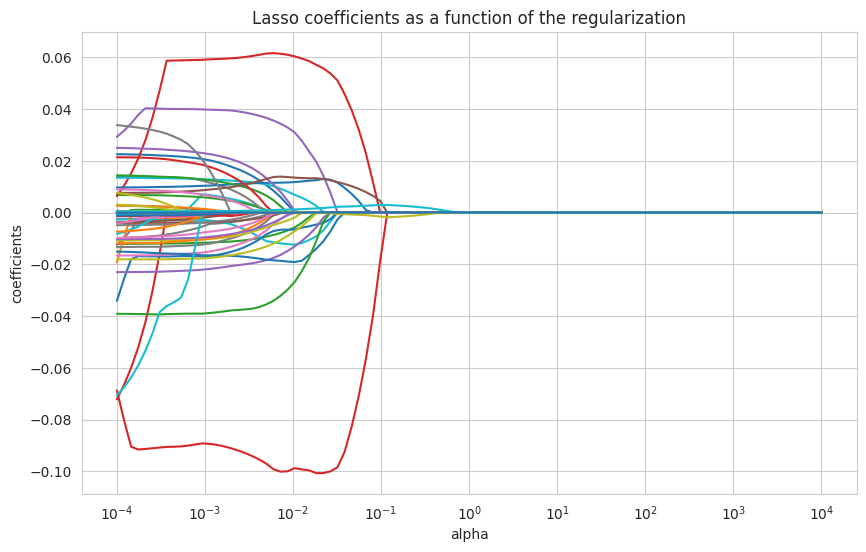

In [167]:
# Define the Lasso model
lasso = Lasso()

# Set up the hyperparameters for GridSearchCV
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0, 200.0]}

# Use GridSearchCV to find the best hyperparameters with cross-validation
lasso_cv = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_preprocessed, y_transformed)

# Get the best Lasso model
best_lasso = lasso_cv.best_estimator_

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_lasso, X_preprocessed, y_transformed, cv=5, scoring='neg_mean_squared_error')
rmsle_cv_scores = np.sqrt(-cv_scores)

# Print the cross-validation results
print("Lasso CV Scores: ", rmsle_cv_scores)
print("Average Lasso CV Score: ", np.mean(rmsle_cv_scores))

# Visualize coefficients as a function of regularization
alphas = np.logspace(-4, 4, 100)
coefs = []

for alpha in alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(X_preprocessed, y_transformed)
    coefs.append(lasso.coef_)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

### Modèle Ridge

Ridge CV Scores:  [0.11503262 0.14773295 0.13145053 0.12301295 0.16842786]
Average Ridge CV Score:  0.13713138263693087


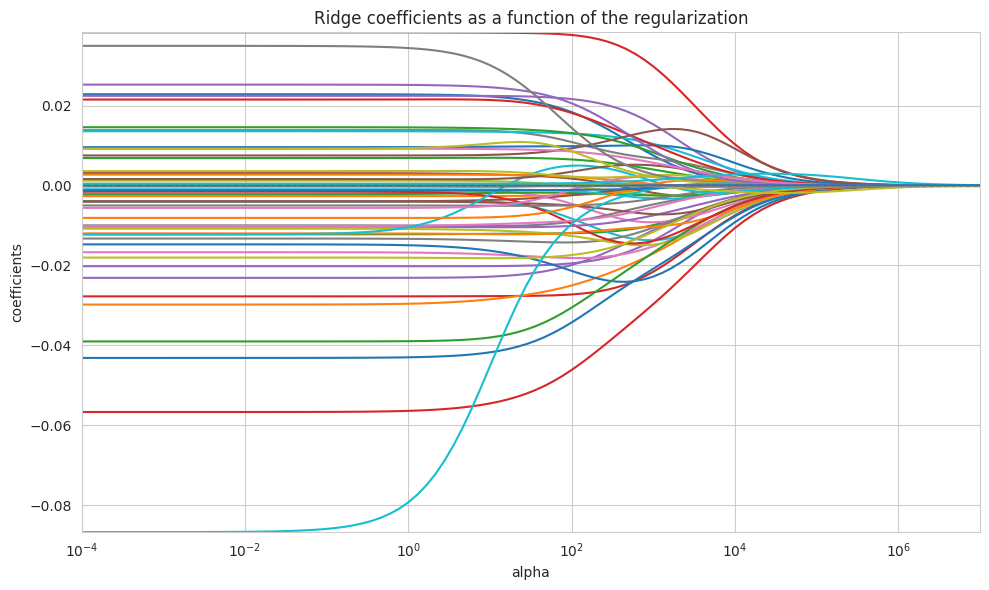

In [168]:
# Define the Ridge model
ridge = Ridge()

# Set up the hyperparameters for GridSearchCV
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0, 200.0]}

# Use GridSearchCV to find the best hyperparameters with cross-validation
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_preprocessed_df, y_transformed)

# Get the best Ridge model
best_ridge = ridge_cv.best_estimator_

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_ridge, X_preprocessed_df, y_transformed, cv=5, scoring='neg_mean_squared_error')
rmse_cv_scores = np.sqrt(-cv_scores)

# Print the cross-validation results
print("Ridge CV Scores: ", rmse_cv_scores)
print("Average Ridge CV Score: ", np.mean(rmse_cv_scores))

# Visualize coefficients as a function of regularization
alphas = np.logspace(-4, 7, 100)
coefs = []

for alpha in alphas:
    ridge.set_params(alpha=alpha)
    ridge.fit(X_preprocessed_df, y_transformed)
    coefs.append(ridge.coef_)

# Convert coefficients to a numpy array for easier manipulation
coefs = np.array(coefs)

# Plot the coefficients
plt.figure(figsize=(10, 6))
for coef in coefs.T:
    plt.plot(alphas, coef)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.axhline(0, color='grey', linestyle='--', linewidth=1)
plt.xlim([min(alphas), max(alphas)])

# Automatically adjust y-axis limits based on coefficients
min_coefs, max_coefs = coefs.min(), coefs.max()
plt.ylim([min_coefs, max_coefs])

plt.tight_layout()
plt.show()

### Modèle Elastic Net

Elastic Net CV Scores:  [0.11484554 0.14893955 0.13012793 0.12260364 0.17393467]
Average Elastic Net CV Score:  0.13809026531585472


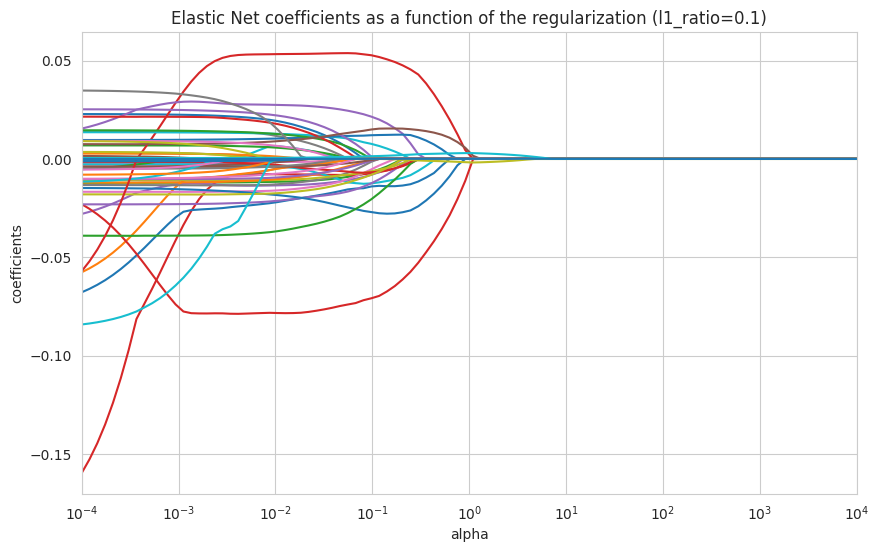

In [169]:
# Define the Elastic Net model
elastic_net = ElasticNet()

# Set up the hyperparameters for GridSearchCV
elastic_net_params = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0, 200.0],
    'l1_ratio': [0.1, 0.5, 0.7, 1.0]
}

# Use GridSearchCV to find the best hyperparameters with cross-validation
elastic_net_cv = GridSearchCV(elastic_net, elastic_net_params, cv=5, scoring='neg_mean_squared_error')
elastic_net_cv.fit(X_preprocessed, y_transformed)

# Get the best Elastic Net model
best_elastic_net = elastic_net_cv.best_estimator_

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_elastic_net, X_preprocessed, y_transformed, cv=5, scoring='neg_mean_squared_error')
rmse_cv_scores = np.sqrt(-cv_scores)

# Print the cross-validation results
print("Elastic Net CV Scores: ", rmse_cv_scores)
print("Average Elastic Net CV Score: ", np.mean(rmse_cv_scores))

# Visualize coefficients as a function of regularization
best_l1_ratio = best_elastic_net.l1_ratio
alphas = np.logspace(-4, 4, 100)
coefs = []

for alpha in alphas:
    elastic_net.set_params(alpha=alpha, l1_ratio=best_l1_ratio)
    elastic_net.fit(X_preprocessed, y_transformed)
    coefs.append(elastic_net.coef_)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title(f'Elastic Net coefficients as a function of the regularization (l1_ratio={best_l1_ratio})')
plt.axis('tight')
plt.xlim([min(alphas), max(alphas)])  # Ensure the x-axis limits cover the full range of alphas
plt.show()

### SHAP

#### Qu'est-ce que SHAP ?

SHAP (SHapley Additive exPlanations) est une méthode d'explication de modèles de machine learning basée sur les valeurs de Shapley de la théorie des jeux. Les valeurs de Shapley attribuent une importance à chaque feature pour chaque prédiction, permettant ainsi d'interpréter les modèles de machine learning de manière transparente et compréhensible.

#### Pourquoi utilisons-nous SHAP ?

1. **Transparence** : SHAP fournit une explication claire de l'importance de chaque feature pour chaque prédiction, ce qui aide à comprendre le fonctionnement interne des modèles de machine learning.
2. **Interprétabilité** : En attribuant une valeur d'importance à chaque feature, SHAP permet de voir quelles variables ont le plus d'influence sur les prédictions du modèle.
3. **Comparabilité** : Les valeurs SHAP sont comparables entre différents modèles, ce qui permet d'évaluer la contribution des features de manière cohérente.

#### Comment utilisons-nous SHAP ?

1. **Initialisation du SHAP Explainer** : Nous initialisons un Explainer SHAP adapté au modèle. Par exemple, pour les modèles complexes comme les réseaux de neurones ou les modèles SVR, nous utilisons `KernelExplainer`, tandis que pour les modèles basés sur les arbres (CatBoost, Random Forest, etc.), nous utilisons `TreeExplainer`.

2. **Calcul des valeurs SHAP** : Nous calculons les valeurs SHAP pour un ensemble de données. Ces valeurs indiquent la contribution de chaque feature à chaque prédiction.

3. **Visualisation des valeurs SHAP** : Nous utilisons diverses méthodes de visualisation fournies par SHAP pour interpréter les résultats. Les graphiques courants incluent les plots de résumé et les plots de force.

   - **Résumé des valeurs SHAP** : Un résumé des valeurs SHAP montre l'importance moyenne des features, triées par ordre décroissant d'importance.

   - **Plots de force** : Les plots de force visualisent l'impact de chaque feature pour une prédiction individuelle, montrant comment les valeurs des features influencent la sortie du modèle.

#### Comment lire les visualisations SHAP ?

1. **Résumé des valeurs SHAP** :
   - **Axe des X** : Importance moyenne des features, mesurée par la valeur absolue des valeurs SHAP moyennes. Une plus grande valeur indique une plus grande importance pour les prédictions.
   - **Axe des Y** : Liste des features. Les features sont triées par ordre décroissant d'importance.
   - **Points** : Chaque point représente la valeur SHAP d'une feature pour une instance particulière. La couleur des points peut représenter la valeur de la feature (par exemple, haut en rouge et bas en bleu).

   **Interprétation** : Les features en haut du graphique ont une plus grande influence sur les prédictions du modèle. Les valeurs SHAP permettent de comprendre quelles features sont les plus déterminantes pour les décisions du modèle.

2. **Plots de force** :
   - Visualisent l'impact de chaque feature sur une prédiction individuelle.
   - Montrent comment les valeurs des features influencent la sortie du modèle en positif ou en négatif.

   **Interprétation** : Ces plots aident à comprendre les raisons derrière une prédiction spécifique en montrant l'effet de chaque feature sur la prédiction finale.

### Modèle Gradient Boosting Regressor


In [170]:
# Define the objective function for Optuna using RMSLE
def objective(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 7)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.2)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
    
    # Initialize the model with suggested hyperparameters
    model = GradientBoostingRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    # Use cross-validation to evaluate the model
    cv_scores = cross_val_score(model, X_preprocessed_df, y_transformed, cv=5, scoring='neg_mean_squared_error')
    rmsle_cv_scores = np.sqrt(-cv_scores)
    
    # Return the average RMSLE score
    return np.mean(rmsle_cv_scores)

# Create a study object and optimize the objective function
study = optuna.create_study(direction='minimize', sampler=TPESampler(seed=42))
study.optimize(objective, n_trials=100)

# Get the best trial
best_trial = study.best_trial
print(f'Best trial: {best_trial.params}')

# Train the model with the best parameters
best_params = best_trial.params
best_boosting_model = GradientBoostingRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)
best_boosting_model.fit(X_preprocessed_df, y_transformed)

# Initialize the SHAP Explainer
explainer = shap.Explainer(best_boosting_model)

# Calculate SHAP values for the preprocessed data
shap_values = explainer(X_preprocessed_df)

# Visualize the SHAP values with a summary plot
shap.summary_plot(shap_values, X_preprocessed_df, plot_type="bar")

# Use the cross-validation RMSLE from the best trial for the final evaluation
best_rmsle = study.best_value
print(f'Best RMSLE: {best_rmsle}')


[I 2024-05-30 12:38:28,906] A new study created in memory with name: no-name-7b8c160a-de67-4907-9f05-f61a33854b9e
[I 2024-05-30 12:38:35,756] Trial 0 finished with value: 0.13434781432199752 and parameters: {'n_estimators': 144, 'max_depth': 7, 'learning_rate': 0.08960785365368121, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.13434781432199752.
[I 2024-05-30 12:38:38,159] Trial 1 finished with value: 0.12736265519596596 and parameters: {'n_estimators': 89, 'max_depth': 3, 'learning_rate': 0.13394334706750485, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.12736265519596596.
[I 2024-05-30 12:38:42,851] Trial 2 finished with value: 0.13610556941533555 and parameters: {'n_estimators': 55, 'max_depth': 7, 'learning_rate': 0.12106896936002161, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.12736265519596596.
[I 2024-05-30 12:38:47,635] Trial 3 finished with value: 0.12840576577296528 and parameter

KeyboardInterrupt: 

### Visualisation des résultats de l'optimisation avec Optuna pour Gradient Boosting Regressor

#### Historique de l'optimisation

Nous traçons l'historique de l'optimisation pour le modèle Gradient Boosting en utilisant la fonction `plot_optimization_history()` d'Optuna.

**Comment lire le graphique :**
- **Axe des X** : Nombre d'essais effectués.
- **Axe des Y** : Valeur de la fonction objectif (RMSLE) pour chaque essai.
- **Points individuels** : Chaque point représente un essai individuel.
- **Ligne** : Indique la tendance générale de l'optimisation.

**Interprétation :**
- Une courbe descendante indique que l'optimisation améliore la performance du modèle au fil des essais.
- Une courbe stable indique une convergence vers une solution optimale.

#### Importance des hyperparamètres

Nous utilisons `plot_param_importances()` pour visualiser l'importance relative des hyperparamètres dans l'optimisation.

**Comment lire le graphique :**
- **Axe des X** : Importance relative des hyperparamètres.
- **Axe des Y** : Hyperparamètres évalués.
- **Barres** : Indiquent l'importance de chaque hyperparamètre.

**Interprétation :**
- Les hyperparamètres avec des barres plus longues ont un impact plus significatif sur la performance du modèle.
- Identifie les hyperparamètres les plus critiques à optimiser.

#### Diagramme de coordonnées parallèles

Nous traçons un diagramme de coordonnées parallèles avec `plot_parallel_coordinate()` pour explorer les relations entre les hyperparamètres et la fonction objectif.

**Comment lire le graphique :**
- **Axes verticaux** : Représentent différents hyperparamètres et la fonction objectif.
- **Lignes** : Chaque ligne représente un essai avec ses hyperparamètres et la performance correspondante.

**Interprétation :**
- Les lignes montrant des combinaisons d'hyperparamètres réussies convergent vers des valeurs optimales.
- Permet d'identifier les interactions entre les hyperparamètres.

#### Slice plot

Nous utilisons `plot_slice()` pour créer un graphique en tranches qui montre l'impact de chaque hyperparamètre individuellement.

**Comment lire le graphique :**
- **Axes** : Chaque axe représente un hyperparamètre différent.
- **Points** : Chaque point représente un essai avec sa valeur de fonction objectif.

**Interprétation :**
- Visualise comment chaque hyperparamètre influence la performance du modèle.
- Identifie les valeurs optimales pour chaque hyperparamètre.

#### Prédictions du modèle

Nous prédictions les valeurs sur l'ensemble du dataset avec le meilleur modèle et traçons un graphique des valeurs réelles vs prédites.

**Comment lire le graphique :**
- **Axe des X** : Valeurs réelles (transformées).
- **Axe des Y** : Valeurs prédites par le modèle.
- **Points** : Chaque point représente une prédiction.
- **Ligne rouge** : Ligne de référence où les valeurs réelles égalent les valeurs prédites.

**Interprétation :**
- Les points proches de la ligne rouge indiquent de bonnes prédictions.
- Évalue la performance globale du modèle.


In [ ]:
# Optimization History
fig1 = vis.plot_optimization_history(study)
fig1.update_layout(title='Optimization History for Gradient Boosting Regressor')
fig1.show()

In [ ]:
# Hyperparameter Importance
fig2 = vis.plot_param_importances(study)
fig2.update_layout(title='Hyperparameter Importance for Gradient Boosting Regressor')
fig2.show()

In [ ]:
# Parallel Coordinate Plot
fig3 = vis.plot_parallel_coordinate(study)
fig3.update_layout(title='Parallel Coordinate Plot for Gradient Boosting Regressor')
fig3.show()

In [ ]:
# Slice Plot
fig4 = vis.plot_slice(study)
fig4.update_layout(title='Slice Plot for Gradient Boosting Regressor')
fig4.show()

In [ ]:
# Predict on the entire dataset with the best model
y_pred_best = best_boosting_model.predict(X_preprocessed_df)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_transformed, y_pred_best, alpha=0.5)
plt.plot([min(y_transformed), max(y_transformed)], [min(y_transformed), max(y_transformed)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

### Modèle XGBoost Regressor

In [ ]:
# Define the objective function
def objective_xgbr(trial):
    # Define hyperparameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0)
    }
    
    # Initialize model
    model = XGBRegressor(**params)
    
    # Perform cross-validation with RMSLE as the scoring metric
    cv_scores = cross_val_score(model, X_preprocessed_df, y_transformed, cv=5, scoring='neg_mean_squared_error')
    
    # Convert negative mean squared error to positive RMSLE
    rmsle_scores = np.sqrt(-cv_scores)
    mean_rmsle = np.mean(rmsle_scores)
    
    return mean_rmsle

# Create the study object and optimize the objective function
study_xgbr = optuna.create_study(direction='minimize', sampler=TPESampler(seed=42))
study_xgbr.optimize(objective_xgbr, n_trials=100)

# Retrieve the best model and its parameters
best_params = study_xgbr.best_trial.params
best_xgbr_model = XGBRegressor(**best_params)
best_xgbr_model.fit(X_preprocessed_df, y_transformed)

# Initialize the SHAP explainer for the XGBoost model
explainer = shap.TreeExplainer(best_xgbr_model)

# Calculate SHAP values for the preprocessed data
shap_values = explainer.shap_values(X_preprocessed_df)

# Visualize the SHAP values with a summary plot
shap.summary_plot(shap_values, X_preprocessed_df, plot_type="bar")

# Use the cross-validation RMSLE from the best trial for the final evaluation
best_rmsle = study_xgbr.best_value
print(f'Best RMSLE: {best_rmsle}')


### Visualisation des résultats de l'optimisation avec Optuna pour XGBoost

#### Historique de l'optimisation

Nous traçons l'historique de l'optimisation pour le modèle XGBoost en utilisant la fonction `plot_optimization_history()` d'Optuna.

**Comment lire le graphique :**
- **Axe des X** : Nombre d'essais effectués.
- **Axe des Y** : Valeur de la fonction objectif (RMSLE) pour chaque essai.
- **Points individuels** : Chaque point représente un essai individuel.
- **Ligne** : Indique la tendance générale de l'optimisation.

**Interprétation :**
- Une courbe descendante indique que l'optimisation améliore la performance du modèle au fil des essais.
- Une courbe stable indique une convergence vers une solution optimale.

#### Importance des hyperparamètres

Nous utilisons `plot_param_importances()` pour visualiser l'importance relative des hyperparamètres dans l'optimisation.

**Comment lire le graphique :**
- **Axe des X** : Importance relative des hyperparamètres.
- **Axe des Y** : Hyperparamètres évalués.
- **Barres** : Indiquent l'importance de chaque hyperparamètre.

**Interprétation :**
- Les hyperparamètres avec des barres plus longues ont un impact plus significatif sur la performance du modèle.
- Identifie les hyperparamètres les plus critiques à optimiser.

#### Diagramme de coordonnées parallèles

Nous traçons un diagramme de coordonnées parallèles avec `plot_parallel_coordinate()` pour explorer les relations entre les hyperparamètres et la fonction objectif.

**Comment lire le graphique :**
- **Axes verticaux** : Représentent différents hyperparamètres et la fonction objectif.
- **Lignes** : Chaque ligne représente un essai avec ses hyperparamètres et la performance correspondante.

**Interprétation :**
- Les lignes montrant des combinaisons d'hyperparamètres réussies convergent vers des valeurs optimales.
- Permet d'identifier les interactions entre les hyperparamètres.

#### Slice plot

Nous utilisons `plot_slice()` pour créer un graphique en tranches qui montre l'impact de chaque hyperparamètre individuellement.

**Comment lire le graphique :**
- **Axes** : Chaque axe représente un hyperparamètre différent.
- **Points** : Chaque point représente un essai avec sa valeur de fonction objectif.

**Interprétation :**
- Visualise comment chaque hyperparamètre influence la performance du modèle.
- Identifie les valeurs optimales pour chaque hyperparamètre.

#### Prédictions du modèle

Nous prédictions les valeurs sur l'ensemble du dataset avec le meilleur modèle XGBoost et traçons un graphique des valeurs réelles vs prédites.

**Comment lire le graphique :**
- **Axe des X** : Valeurs réelles (SalePrice).
- **Axe des Y** : Valeurs prédites par le modèle (SalePrice).
- **Points** : Chaque point représente une prédiction.
- **Ligne noire en pointillés** : Ligne de référence où les valeurs réelles égalent les valeurs prédites.

**Interprétation :**
- Les points proches de la ligne noire indiquent de bonnes prédictions.
- Évalue la performance globale du modèle.

In [ ]:
# Optimization History
fig1 = vis.plot_optimization_history(study_xgbr)
fig1.update_layout(title='Optimization History for XGBoost Regressor')
fig1.show()

In [ ]:
# Hyperparameter Importance
fig2 = vis.plot_param_importances(study_xgbr)
fig2.update_layout(title='Hyperparameter Importance for XGBoost Regressor')
fig2.show()

In [ ]:
# Parallel Coordinate Plot
fig3 = vis.plot_parallel_coordinate(study_xgbr)
fig3.update_layout(title='Parallel Coordinate Plot for XGBoost Regressor')
fig3.show()

In [ ]:
# Slice Plot
fig4 = vis.plot_slice(study_xgbr)
fig4.update_layout(title='Slice Plot for XGBoost Regressor')
fig4.show()

In [ ]:
# Predict on the entire dataset using the best XGBoost model
y_pred_xgbr = best_xgbr_model.predict(X_preprocessed_df)

# Visualize Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=np.expm1(y_transformed), y=np.expm1(y_pred_xgbr), alpha=0.5)
plt.plot([np.expm1(y_transformed).min(), np.expm1(y_transformed).max()], [np.expm1(y_transformed).min(), np.expm1(y_transformed).max()], 'k--', lw=3)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs. Predicted SalePrice (XGBoost Regressor)')
plt.show()


### Modèle Random Forest Regressor

In [ ]:
# Define the objective function
def objective_rfr(trial):
    # Define hyperparameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    }
    
    # Initialize model
    model = RandomForestRegressor(**params)
    
    # Perform cross-validation with RMSLE as the scoring metric
    cv_scores = cross_val_score(model, X_preprocessed_df, y_transformed, cv=5, scoring='neg_mean_squared_error')
    
    # Convert negative mean squared error to positive RMSLE
    rmsle_scores = np.sqrt(-cv_scores)
    mean_rmsle = np.mean(rmsle_scores)
    
    return mean_rmsle

# Run optimization
study_rfr = optuna.create_study(direction='minimize', sampler=TPESampler(seed=42))
study_rfr.optimize(objective_rfr, n_trials=100)

# Retrieve the best trial
best_trial = study_rfr.best_trial
print(f"Best trial for Random Forest Regressor: {study_rfr.best_trial.params}")

# Train the model with the best parameters
best_params = best_trial.params
best_rfr_model = RandomForestRegressor(**best_params)
best_rfr_model.fit(X_preprocessed_df, y_transformed)

# Initialize the SHAP Explainer
explainer = shap.Explainer(best_rfr_model, X_preprocessed_df)

# Calculate SHAP values for the preprocessed data
shap_values = explainer(X_preprocessed_df)

# Visualize the SHAP values with a summary plot
shap.summary_plot(shap_values, X_preprocessed_df, plot_type="bar")

# Use the cross-validation RMSLE from the best trial for the final evaluation
best_rmsle = study_rfr.best_value
print(f'Best RMSLE: {best_rmsle}')

### Visualisation des résultats de l'optimisation avec Optuna pour Random Forest

#### Historique de l'optimisation

Nous traçons l'historique de l'optimisation pour le modèle Random Forest en utilisant la fonction `plot_optimization_history()` d'Optuna.

**Comment lire le graphique :**
- **Axe des X** : Nombre d'essais effectués.
- **Axe des Y** : Valeur de la fonction objectif (RMSLE) pour chaque essai.
- **Points individuels** : Chaque point représente un essai individuel.
- **Ligne** : Indique la tendance générale de l'optimisation.

**Interprétation :**
- Une courbe descendante indique que l'optimisation améliore la performance du modèle au fil des essais.
- Une courbe stable indique une convergence vers une solution optimale.

#### Importance des hyperparamètres

Nous utilisons `plot_param_importances()` pour visualiser l'importance relative des hyperparamètres dans l'optimisation.

**Comment lire le graphique :**
- **Axe des X** : Importance relative des hyperparamètres.
- **Axe des Y** : Hyperparamètres évalués.
- **Barres** : Indiquent l'importance de chaque hyperparamètre.

**Interprétation :**
- Les hyperparamètres avec des barres plus longues ont un impact plus significatif sur la performance du modèle.
- Identifie les hyperparamètres les plus critiques à optimiser.

#### Diagramme de coordonnées parallèles

Nous traçons un diagramme de coordonnées parallèles avec `plot_parallel_coordinate()` pour explorer les relations entre les hyperparamètres et la fonction objectif.

**Comment lire le graphique :**
- **Axes verticaux** : Représentent différents hyperparamètres et la fonction objectif.
- **Lignes** : Chaque ligne représente un essai avec ses hyperparamètres et la performance correspondante.

**Interprétation :**
- Les lignes montrant des combinaisons d'hyperparamètres réussies convergent vers des valeurs optimales.
- Permet d'identifier les interactions entre les hyperparamètres.

#### Slice plot

Nous utilisons `plot_slice()` pour créer un graphique en tranches qui montre l'impact de chaque hyperparamètre individuellement.

**Comment lire le graphique :**
- **Axes** : Chaque axe représente un hyperparamètre différent.
- **Points** : Chaque point représente un essai avec sa valeur de fonction objectif.

**Interprétation :**
- Visualise comment chaque hyperparamètre influence la performance du modèle.
- Identifie les valeurs optimales pour chaque hyperparamètre.

#### Prédictions du modèle

Nous faisons des prédictions sur l'ensemble du dataset avec le meilleur modèle Random Forest et traçons un graphique des valeurs réelles vs prédites.

**Comment lire le graphique :**
- **Axe des X** : Valeurs réelles (SalePrice).
- **Axe des Y** : Valeurs prédites par le modèle (SalePrice).
- **Points** : Chaque point représente une prédiction.
- **Ligne noire en pointillés** : Ligne de référence où les valeurs réelles égalent les valeurs prédites.

**Interprétation :**
- Les points proches de la ligne noire indiquent de bonnes prédictions.
- Évalue la performance globale du modèle.

In [ ]:
# Optimization History
fig1 = vis.plot_optimization_history(study_rfr)
fig1.update_layout(title='Optimization History for Random Forest Regressor')
fig1.show()

In [ ]:
# Hyperparameter Importance
fig2 = vis.plot_param_importances(study_rfr)
fig2.update_layout(title='Hyperparameter Importance for Random Forest Regressor')
fig2.show()

In [ ]:
# Parallel Coordinate Plot
fig3 = vis.plot_parallel_coordinate(study_rfr)
fig3.update_layout(title='Parallel Coordinate Plot for Random Forest Regressor')
fig3.show()

In [ ]:
# Slice Plot
fig4 = vis.plot_slice(study_rfr)
fig4.update_layout(title='Slice Plot for Random Forest Regressor')
fig4.show()

In [ ]:

# Predict on the entire dataset using the best Random Forest model
y_pred_rfr = best_rfr_model.predict(X_preprocessed_df)

# Visualize Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=np.expm1(y_transformed), y=np.expm1(y_pred_rfr), alpha=0.5)
plt.plot([np.expm1(y_transformed).min(), np.expm1(y_transformed).max()], [np.expm1(y_transformed).min(), np.expm1(y_transformed).max()], 'k--', lw=3)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs. Predicted SalePrice (Random Forest Regressor)')
plt.show()

### Modèle Support Vector Regressor
#### Initialisation de l'Explainer SHAP

Pour expliquer les prédictions du modèle SVR, nous utilisons SHAP (SHapley Additive exPlanations). Pour le modèle SVR, nous employons `KernelExplainer`, qui est adapté aux modèles non linéaires et complexes.

**Note importante** : Nous utilisons un sous-ensemble des données (`X_preprocessed_df[:100]`) pour initialiser l'Explainer et calculer les valeurs SHAP. Cela est nécessaire pour des raisons de performance et de faisabilité computationnelle, car le calcul des valeurs SHAP pour un modèle SVR peut être très intensif en ressources.

#### Calcul et interprétation des valeurs SHAP

Nous calculons les valeurs SHAP pour le sous-ensemble des données. Les valeurs SHAP représentent l'importance de chaque feature pour chaque prédiction, permettant d'expliquer comment chaque feature influence les prédictions du modèle.

**Visualisation avec SHAP** :
- **Axe des X** : Importance des features, mesurée par les valeurs SHAP.
- **Axe des Y** : Features, triées par ordre d'importance.
- **Barres** : Représentent l'importance moyenne des features.

Cette visualisation aide à comprendre les contributions des différentes features aux prédictions du modèle SVR, assurant une interprétation claire et transparente.


In [ ]:
# Define the objective function
def objective_svr(trial):
    # Define hyperparameters
    params = {
        'C': trial.suggest_float('C', 1e-2, 10.0, log=True),
        'epsilon': trial.suggest_float('epsilon', 1e-4, 1.0, log=True),
        'gamma': trial.suggest_categorical('gamma', ['scale', 'auto'])
    }
    
    # Initialize model
    model = SVR(**params)
    
    # Perform cross-validation with RMSLE as the scoring metric
    cv_scores = cross_val_score(model, X_preprocessed_df, y_transformed, cv=5, scoring='neg_mean_squared_error')
    
    # Convert negative mean squared error to positive RMSLE
    rmsle_scores = np.sqrt(-cv_scores)
    mean_rmsle = np.mean(rmsle_scores)
    
    return mean_rmsle

# Run optimization
study_svr = optuna.create_study(direction='minimize', sampler=TPESampler(seed=42))
study_svr.optimize(objective_svr, n_trials=100)

# Retrieve the best trial
best_svr_params = study_svr.best_trial.params
print(f"Best trial for SVR: {study_svr.best_trial.params}")

# Train the model with the best parameters
best_svr_model = SVR(**best_svr_params)
best_svr_model.fit(X_preprocessed_df, y_transformed)

# Initialize the SHAP Explainer
explainer = shap.KernelExplainer(best_svr_model.predict, X_preprocessed_df[:100])  # Use a subset for kernel SHAP

# Calculate SHAP values for the preprocessed data
shap_values = explainer.shap_values(X_preprocessed_df[:100])

# Use the cross-validation RMSLE from the best trial for the final evaluation
best_rmsle = study_svr.best_value
print(f'Best RMSLE: {best_rmsle}')

### Visualisation des résultats de l'optimisation avec Optuna pour SVR

#### Historique de l'optimisation

Nous traçons l'historique de l'optimisation pour le modèle SVR en utilisant la fonction `plot_optimization_history()` d'Optuna.

**Comment lire le graphique :**
- **Axe des X** : Nombre d'essais effectués.
- **Axe des Y** : Valeur de la fonction objectif (RMSLE) pour chaque essai.
- **Points individuels** : Chaque point représente un essai individuel.
- **Ligne** : Indique la tendance générale de l'optimisation.

**Interprétation :**
- Une courbe descendante indique que l'optimisation améliore la performance du modèle au fil des essais.
- Une courbe stable indique une convergence vers une solution optimale.

#### Importance des hyperparamètres

Nous utilisons `plot_param_importances()` pour visualiser l'importance relative des hyperparamètres dans l'optimisation.

**Comment lire le graphique :**
- **Axe des X** : Importance relative des hyperparamètres.
- **Axe des Y** : Hyperparamètres évalués.
- **Barres** : Indiquent l'importance de chaque hyperparamètre.

**Interprétation :**
- Les hyperparamètres avec des barres plus longues ont un impact plus significatif sur la performance du modèle.
- Identifie les hyperparamètres les plus critiques à optimiser.

#### Diagramme de coordonnées parallèles

Nous traçons un diagramme de coordonnées parallèles avec `plot_parallel_coordinate()` pour explorer les relations entre les hyperparamètres et la fonction objectif.

**Comment lire le graphique :**
- **Axes verticaux** : Représentent différents hyperparamètres et la fonction objectif.
- **Lignes** : Chaque ligne représente un essai avec ses hyperparamètres et la performance correspondante.

**Interprétation :**
- Les lignes montrant des combinaisons d'hyperparamètres réussies convergent vers des valeurs optimales.
- Permet d'identifier les interactions entre les hyperparamètres.

#### Slice plot

Nous utilisons `plot_slice()` pour créer un graphique en tranches qui montre l'impact de chaque hyperparamètre individuellement.

**Comment lire le graphique :**
- **Axes** : Chaque axe représente un hyperparamètre différent.
- **Points** : Chaque point représente un essai avec sa valeur de fonction objectif.

**Interprétation :**
- Visualise comment chaque hyperparamètre influence la performance du modèle.
- Identifie les valeurs optimales pour chaque hyperparamètre.

In [ ]:
# Optimization History
fig1 = vis.plot_optimization_history(study_svr)
fig1.update_layout(title='Optimization History for SVR')
fig1.show()

In [ ]:
# Hyperparameter Importance
fig2 = vis.plot_param_importances(study_svr)
fig2.update_layout(title='Hyperparameter Importance for SVR')
fig2.show()

In [ ]:
# Parallel Coordinate Plot
fig3 = vis.plot_parallel_coordinate(study_svr)
fig3.update_layout(title='Parallel Coordinate Plot for SVR')
fig3.show()

In [ ]:
# Slice Plot
fig4 = vis.plot_slice(study_svr)
fig4.update_layout(title='Slice Plot for SVR')
fig4.show()

### Modèle CatBoost Regressor

In [ ]:
# Define the objective function
def objective_cat(trial):
    # Define hyperparameters
    params = {
        'iterations': trial.suggest_int('iterations', 50, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'border_count': trial.suggest_int('border_count', 1, 255)
    }
    
    # Initialize model
    model = CatBoostRegressor(**params, verbose=0)
    
    # Perform cross-validation with RMSLE as the scoring metric
    cv_scores = cross_val_score(model, X_preprocessed_df, y_transformed, cv=5, scoring='neg_mean_squared_error')
    
    # Convert negative mean squared error to positive RMSLE
    rmsle_scores = np.sqrt(-cv_scores)
    mean_rmsle = np.mean(rmsle_scores)
    
    return mean_rmsle

# Run optimization
study_cat = optuna.create_study(direction='minimize', sampler=TPESampler(seed=42))
study_cat.optimize(objective_cat, n_trials=100)

# Retrieve the best trial
best_cat_params = study_cat.best_trial.params
print(f"Best trial for CatBoost Regressor: {study_cat.best_trial.params}")

# Train the model with the best parameters
best_cat_model = CatBoostRegressor(**best_cat_params, verbose=0)
best_cat_model.fit(X_preprocessed_df, y_transformed)

# Initialize the SHAP Explainer
explainer = shap.TreeExplainer(best_cat_model)

# Calculate SHAP values for the preprocessed data
shap_values = explainer.shap_values(X_preprocessed_df)

# Visualize the SHAP values with a summary plot
shap.summary_plot(shap_values, X_preprocessed_df, plot_type="bar")

# Use the cross-validation RMSLE from the best trial for the final evaluation
best_rmsle = study_cat.best_value
print(f'Best RMSLE: {best_rmsle}')

### Visualisation des résultats de l'optimisation avec Optuna pour CatBoost

#### Historique de l'optimisation

Nous traçons l'historique de l'optimisation pour le modèle CatBoost en utilisant la fonction `plot_optimization_history()` d'Optuna.

**Comment lire le graphique :**
- **Axe des X** : Nombre d'essais effectués.
- **Axe des Y** : Valeur de la fonction objectif (RMSLE) pour chaque essai.
- **Points individuels** : Chaque point représente un essai individuel.
- **Ligne** : Indique la tendance générale de l'optimisation.

**Interprétation :**
- Une courbe descendante indique que l'optimisation améliore la performance du modèle au fil des essais.
- Une courbe stable indique une convergence vers une solution optimale.

#### Importance des hyperparamètres

Nous utilisons `plot_param_importances()` pour visualiser l'importance relative des hyperparamètres dans l'optimisation.

**Comment lire le graphique :**
- **Axe des X** : Importance relative des hyperparamètres.
- **Axe des Y** : Hyperparamètres évalués.
- **Barres** : Indiquent l'importance de chaque hyperparamètre.

**Interprétation :**
- Les hyperparamètres avec des barres plus longues ont un impact plus significatif sur la performance du modèle.
- Identifie les hyperparamètres les plus critiques à optimiser.

#### Diagramme de coordonnées parallèles

Nous traçons un diagramme de coordonnées parallèles avec `plot_parallel_coordinate()` pour explorer les relations entre les hyperparamètres et la fonction objectif.

**Comment lire le graphique :**
- **Axes verticaux** : Représentent différents hyperparamètres et la fonction objectif.
- **Lignes** : Chaque ligne représente un essai avec ses hyperparamètres et la performance correspondante.

**Interprétation :**
- Les lignes montrant des combinaisons d'hyperparamètres réussies convergent vers des valeurs optimales.
- Permet d'identifier les interactions entre les hyperparamètres.

#### Slice plot

Nous utilisons `plot_slice()` pour créer un graphique en tranches qui montre l'impact de chaque hyperparamètre individuellement.

**Comment lire le graphique :**
- **Axes** : Chaque axe représente un hyperparamètre différent.
- **Points** : Chaque point représente un essai avec sa valeur de fonction objectif.

**Interprétation :**
- Visualise comment chaque hyperparamètre influence la performance du modèle.
- Identifie les valeurs optimales pour chaque hyperparamètre.

#### Prédictions du modèle CatBoost

Nous faisons des prédictions sur l'ensemble du dataset avec le meilleur modèle CatBoost et traçons un graphique des valeurs réelles vs prédites.

**Comment lire le graphique :**
- **Axe des X** : Valeurs réelles (SalePrice).
- **Axe des Y** : Valeurs prédites par le modèle (SalePrice).
- **Points** : Chaque point représente une prédiction.
- **Ligne noire en pointillés** : Ligne de référence où les valeurs réelles égalent les valeurs prédites.

**Interprétation :**
- Les points proches de la ligne noire indiquent de bonnes prédictions.
- Évalue la performance globale du modèle.

In [ ]:
# Optimization History
fig1 = vis.plot_optimization_history(study_cat)
fig1.update_layout(title='Optimization History for CatBoost Regressor')
fig1.show()

In [ ]:
# Hyperparameter Importance
fig2 = vis.plot_param_importances(study_cat)
fig2.update_layout(title='Hyperparameter Importance for CatBoost Regressor')
fig2.show()

In [ ]:
# Parallel Coordinate Plot
fig3 = vis.plot_parallel_coordinate(study_cat)
fig3.update_layout(title='Parallel Coordinate Plot for CatBoost Regressor')
fig3.show()

In [ ]:
# Predict on the entire dataset using the best SVR model
y_pred_cat = best_cat_model.predict(X_preprocessed_df)

# Visualize Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=np.expm1(y_transformed), y=np.expm1(y_pred_cat), alpha=0.5)
plt.plot([np.expm1(y_transformed).min(), np.expm1(y_transformed).max()], [np.expm1(y_transformed).min(), np.expm1(y_transformed).max()], 'k--', lw=3)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs. Predicted SalePrice (SVR)')
plt.show()

In [ ]:
# Slice Plot
fig4 = vis.plot_slice(study_cat)
fig4.update_layout(title='Slice Plot for CatBoost Regressor')
fig4.show()

### Préparation des prédictions finales et soumission pour différents modèles

#### Chargement et transformation des données de test

Nous chargeons les données de test à partir du fichier `test.csv`, en utilisant la colonne `Id` comme index. Ensuite, nous appliquons le pipeline de prétraitement (`pipeline.transform(test)`) aux données de test pour les transformer de la même manière que les données d'entraînement.

#### Entraînement des modèles et prédictions

Pour chaque modèle optimisé (CatBoost, Gradient Boosting, XGBoost, Random Forest, SVR, Lasso, Ridge, Elastic Net), nous réalisons les étapes suivantes :

1. **Entraînement du modèle** : Le modèle est entraîné sur l'ensemble des données d'entraînement prétraitées (`X_preprocessed`) et la variable cible transformée (`y_transformed`).
2. **Prédictions sur les données de test** : Nous faisons des prédictions sur les données de test transformées (`X_test_preprocessed`) en utilisant le modèle entraîné.
3. **Inversion de la transformation logarithmique** : Nous appliquons l'inverse de la transformation logarithmique (`np.expm1`) sur les prédictions pour revenir à l'échelle originale des prix de vente.
4. **Préparation du fichier de soumission** : Nous préparons un DataFrame pour la soumission avec les identifiants des maisons (`Id`) et les prix de vente prédites (`SalePrice`). Ce DataFrame est ensuite enregistré en tant que fichier CSV.

In [ ]:
# Load the test data
test = pd.read_csv('test.csv', index_col='Id')

# Transform the test data
X_test_preprocessed = pipeline.transform(test)

# Train the model on the entire training data using the best CatBoost model
best_cat_model.fit(X_preprocessed, y_transformed)

# Make predictions on the test data
y_pred_test = best_cat_model.predict(X_test_preprocessed)

# Reverse the log transformation on the predictions
y_pred_test_exp = np.expm1(y_pred_test)

# Prepare the submission file
submission = pd.DataFrame({
    'Id': test.index,
    'SalePrice': y_pred_test_exp
})

# Save the submission file as submission.csv
submission.to_csv('submission_cat_boost.csv', index=False)

In [ ]:
# Train the model on the entire training data
best_boosting_model.fit(X_preprocessed, y_transformed)

# Make predictions on the test data
y_pred_test = best_boosting_model.predict(X_test_preprocessed)

# Reverse the log transformation on the predictions
y_pred_test_exp = np.expm1(y_pred_test)

# Prepare the submission file
submission = pd.DataFrame({
    'Id': test.index,
    'SalePrice': y_pred_test_exp
})

# Save the submission file as submission.csv
submission.to_csv('submission_boosting.csv', index=False)

In [ ]:
# Train the model on the entire training data
best_xgbr_model.fit(X_preprocessed, y_transformed)

# Make predictions on the test data
y_pred_test = best_xgbr_model.predict(X_test_preprocessed)

# Reverse the log transformation on the predictions
y_pred_test_exp = np.expm1(y_pred_test)

# Prepare the submission file
submission = pd.DataFrame({
    'Id': test.index,
    'SalePrice': y_pred_test_exp
})

# Save the submission file as submission.csv
submission.to_csv('submission_xgbr.csv', index=False)

In [ ]:
# Train the model on the entire training data
best_rfr_model.fit(X_preprocessed, y_transformed)

# Make predictions on the test data
y_pred_test = best_rfr_model.predict(X_test_preprocessed)

# Reverse the log transformation on the predictions
y_pred_test_exp = np.expm1(y_pred_test)

# Prepare the submission file
submission = pd.DataFrame({
    'Id': test.index,
    'SalePrice': y_pred_test_exp
})

# Save the submission file as submission.csv
submission.to_csv('submission_rfr.csv', index=False)

In [ ]:
# Train the model on the entire training data
best_svr_model.fit(X_preprocessed, y_transformed)

# Make predictions on the test data
y_pred_test = best_svr_model.predict(X_test_preprocessed)

# Reverse the log transformation on the predictions
y_pred_test_exp = np.expm1(y_pred_test)

# Prepare the submission file
submission = pd.DataFrame({
    'Id': test.index,
    'SalePrice': y_pred_test_exp
})

# Save the submission file as submission.csv
submission.to_csv('submission_svr.csv', index=False)

In [ ]:
# Train the model on the entire training data
best_lasso.fit(X_preprocessed, y_transformed)

# Make predictions on the test data
y_pred_test = best_lasso.predict(X_test_preprocessed)

# Reverse the log transformation on the predictions
y_pred_test_exp = np.expm1(y_pred_test)

# Prepare the submission file
submission = pd.DataFrame({
    'Id': test.index,
    'SalePrice': y_pred_test_exp
})

# Save the submission file as submission.csv
submission.to_csv('submission_lasso.csv', index=False)

In [ ]:
# Train the model on the entire training data
best_ridge.fit(X_preprocessed, y_transformed)

# Make predictions on the test data
y_pred_test = best_ridge.predict(X_test_preprocessed)

# Reverse the log transformation on the predictions
y_pred_test_exp = np.expm1(y_pred_test)

# Prepare the submission file
submission = pd.DataFrame({
    'Id': test.index,
    'SalePrice': y_pred_test_exp
})

# Save the submission file as submission.csv
submission.to_csv('submission_ridge.csv', index=False)

In [ ]:
# Train the model on the entire training data
best_elastic_net.fit(X_preprocessed, y_transformed)

# Make predictions on the test data
y_pred_test = best_elastic_net.predict(X_test_preprocessed)

# Reverse the log transformation on the predictions
y_pred_test_exp = np.expm1(y_pred_test)

# Prepare the submission file
submission = pd.DataFrame({
    'Id': test.index,
    'SalePrice': y_pred_test_exp
})

# Save the submission file as submission.csv
submission.to_csv('submission_elastic.csv', index=False)

### Soumission des prédictions à Kaggle

- **Configuration des identifiants** : Les identifiants de l'API Kaggle sont configurés.
- **Liste des soumissions** : Une liste de fichiers de soumission et de noms de modèles est créée.
- **Fonction de soumission** : Une fonction est définie pour soumettre les fichiers de prédiction à Kaggle.
- **Soumission en boucle** : Tous les fichiers de soumission sont soumis à Kaggle dans une boucle.


In [ ]:
import subprocess
import os

# Set up Kaggle API credentials
os.environ['KAGGLE_USERNAME'] = 'my_kaggle_username'
os.environ['KAGGLE_KEY'] = 'my_kaggle_api'

# List of submission files and their respective model names
submissions = [
    ("submission_cat_boost.csv", "CatBoost Model"),
    ("submission_boosting.csv", "Boosting Model"),
    ("submission_xgbr.csv", "XGBoost Regressor Model"),
    ("submission_rfr.csv", "Random Forest Regressor Model"),
    ("submission_svr.csv", "SVR Model"),
    ("submission_lasso.csv", "Lasso Model"),
    ("submission_ridge.csv", "Ridge Model"),
    ("submission_elastic.csv", "Elastic Net Model")
]

# Competition name
competition_name = "house-prices-advanced-regression-techniques"

# Function to submit to Kaggle
def submit_to_kaggle(file_name, model_name, competition_name):
    message = f"Submission for {model_name}"
    command = f"kaggle competitions submit -c {competition_name} -f {file_name} -m '{message}'"
    try:
        output = subprocess.run(command, shell=True, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        print(f"Successfully submitted {file_name}")
        print(output.stdout.decode())
    except subprocess.CalledProcessError as e:
        print(f"Failed to submit {file_name}. Error: {e.stderr.decode()}")

# Submit all files
for file_name, model_name in submissions:
    submit_to_kaggle(file_name, model_name, competition_name)
